<img style="float: left;" src="attachment:D2Klogo.png" width="20%"> 

<center>

# Welcome to COMP 680 #
### Statistics for Computing and Data Science ###

### Homework 3 Due 10/10 by Midnight ###

In [2]:
### standard imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('fivethirtyeight')
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns

import random

## Visualizing Data in Python

When working with a new dataset, one of the most useful things to do is to begin to visualize the data. By using tables, histograms, box plots, and other visual tools, we can get a better idea of what the data may be trying to tell us, and we can gain insights into the data that we may have not discovered otherwise.

The easiest way to generate simple visualizations is to use plotting function `df.plot` in Pandas (based on matplotlib):
* [`df.plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=dataframe%20plot#pandas.DataFrame.plot)
You need to specify and the `kind` of plot (the default is a line plot) and the columns for `x` and `y` axis (the default is different for different kind of plots). 

In [3]:
# Load in the data set
tips = sns.load_dataset("tips")

### Always take a look at the data!
When you begin working with a new data set,  it is often best to print out the first few rows before you begin other analysis. This will show you what kind of data is in the dataset, what data types you are working with, and will serve as a reference for the other plots that we are about to make. 

In [4]:
# Print out the first few rows of the data
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Some simple plots

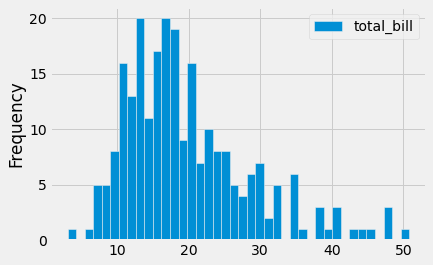

In [5]:
# histogram of one column
# there is only one column for the df so no need to specify x and y axis
tips[['total_bill']].plot(kind='hist', bins=40);

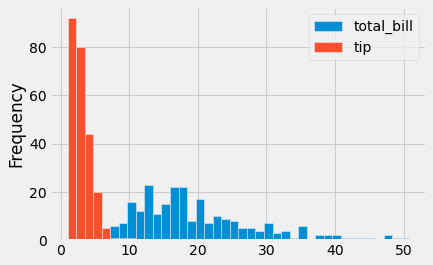

In [6]:
# histogram of two columns
# by default it will plot both columns in the df
tips[['total_bill', 'tip']].plot(kind='hist', bins=40);

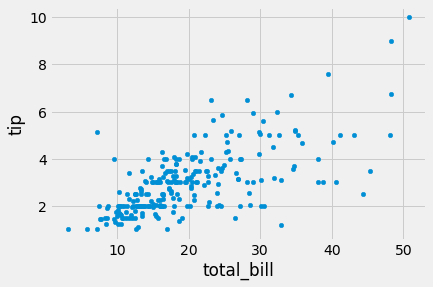

In [7]:
# scatter plot: need to define columns for x and y
tips.plot(x='total_bill', y='tip', kind='scatter');

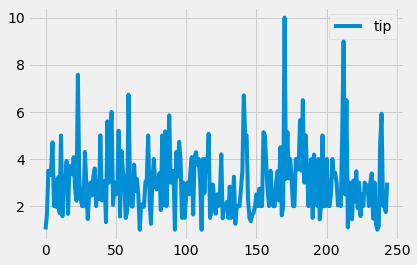

In [8]:
# line plot is the default kind (this is a bad plot)
# use row index as default choice for x axis
tips[['tip']].plot();

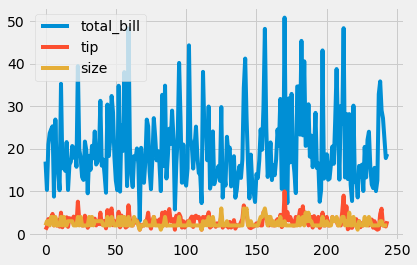

In [9]:
# what happens if use all default? (this is a bad plot)
# a line plot with row index for x axis, 
# and plot all other numerical columns in the df
tips.plot();

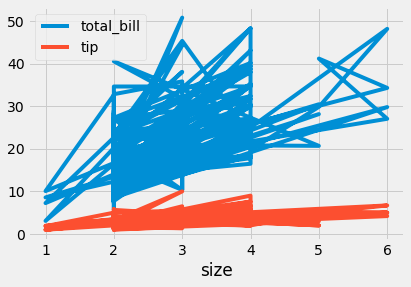

In [10]:
# you can also specify x axis (this is a terrible plot)
# will plot all other numerical columns in the df
tips.plot(x='size');

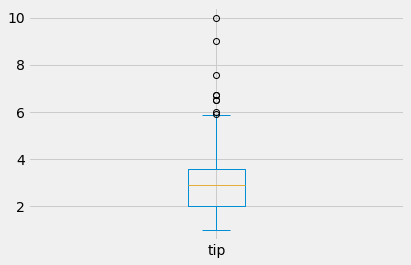

In [11]:
# box plot
tips[['tip']].plot(kind='box');

### Summarize the Data - Tables and Plots

[`df.describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

Summary statistics, which include things like the mean, min, and max of the data, can be useful to get a feel for how large some of the variables are and what variables may be the most important. 

In [12]:
# print out the summary statistics for the quantitative variables
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Frequency tables

The [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) method can be used to determine the number of times that each distinct value of a variable occurs in a data set.  In statistical terms, this is the "frequency distribution" of the variable. Below we show the frequency distribution of the `sex` and `day` variables.

The `value_counts` method produces a table with two columns.  The first column contains all distinct observed values for the variable.  The second column contains the number of times each of these values occurs.  Note that the table returned by `value_counts` is actually a Pandas series.

In [13]:
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

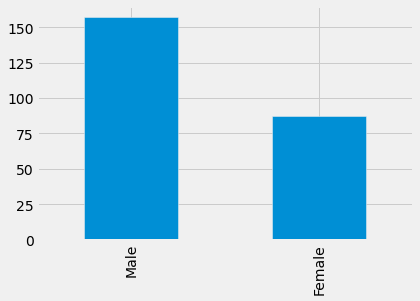

In [14]:
# a bar plot
tips["sex"].value_counts().plot(kind='bar');

In [15]:
tips["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

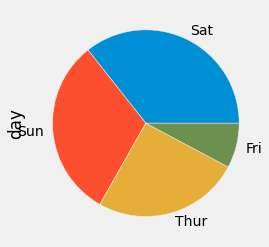

In [16]:
# pie plot
tips["day"].value_counts().plot(kind='pie');

#### Groupby
[pd.df.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) is an easy way to summrize data by categorical variable using an aggregate function.

In [17]:
tips.groupby("sex").mean()

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [18]:
# aggregate function mean only applies to other numerical variables
x=tips.groupby("sex").mean()

In [19]:
type(x)

pandas.core.frame.DataFrame

In [20]:
rate_tip = []
x.shape[0]
for row in range(x.shape[0]):
    value = x.iloc[row]['tip']/x.iloc[row]['total_bill']
    rate_tip.append(value)
print(rate_tip)

[0.14893976332741754, 0.1569177885992552]


In [21]:
x['tip_over_total']=rate_tip

In [22]:
x.head()

,total_bill,tip,size,tip_over_total
sex,,,,
Male,20.744076,3.089618,2.630573,0.148940
Female,18.056897,2.833448,2.459770,0.156918


In [23]:
y=tips.groupby("sex").mean()
y

,total_bill,tip,size
sex,,,
Male,20.744076,3.089618,2.630573
Female,18.056897,2.833448,2.459770


In [24]:
y['tip_o_total']=y['tip']/y['total_bill']
y

,total_bill,tip,size,tip_o_total
sex,,,,
Male,20.744076,3.089618,2.630573,0.148940
Female,18.056897,2.833448,2.459770,0.156918


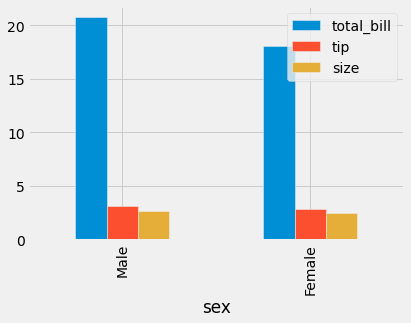

In [25]:
# bar plot
tips.groupby("sex").mean().plot(kind='bar');

In [26]:
# aggregate function count applies to all other variables
# however, this is the same as value_counts()
tips.groupby("sex").count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Male,157,157,157,157,157,157
Female,87,87,87,87,87,87


In [27]:
# what does this return?
tips.groupby("day").max()

/var/folders/_6/l3fpk3z10lb5g2csy8ykd4lw0000gn/T/ipykernel_1395/986917356.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  tips.groupby("day").max()


,total_bill,tip,size
day,,,
Thur,43.11,6.70,6
Fri,40.17,4.73,4
Sat,50.81,10.00,5
Sun,48.17,6.50,6


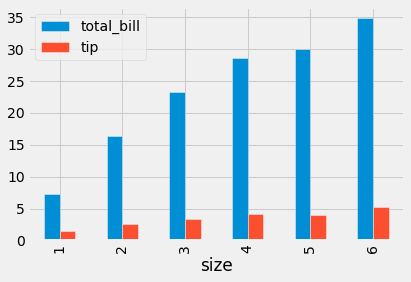

In [28]:
# this is much better than the terrible plot
# average bill and tip amount for party size
tips.groupby("size").mean().plot(kind='bar');

#### Pivot table
[df.pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) is a way to summarize one numerical variable according to two categorical variable, and an aggregate function that applies to that numerical variable.

In [29]:
# this returns average total bills by day and sex
sex_day = tips.pivot_table(index="day", columns="sex", values="total_bill", aggfunc="mean")
sex_day

sex,Male,Female
day,,
Thur,18.714667,16.715312
Fri,19.857000,14.145556
Sat,20.802542,19.680357
Sun,21.887241,19.872222


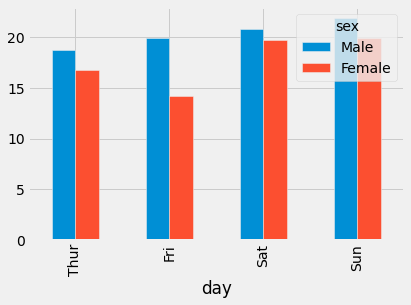

In [30]:
# another bar plot
sex_day.plot(kind='bar');

In [31]:
# this returns the number of records in the data by smoker and sex
sex_smoker = tips.pivot_table(index="smoker", columns="sex", values="total_bill", aggfunc="count")
sex_smoker

sex,Male,Female
smoker,,
Yes,60,33
No,97,54


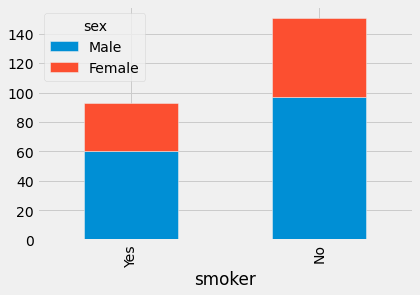

In [32]:
# stacked bar plot
sex_smoker.plot(kind='bar', stacked=True);

### Plotting with [Seaborn](https://seaborn.pydata.org/)

Seaborn is a Python data visualization library also based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. It has good default settings for a lot of plots. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


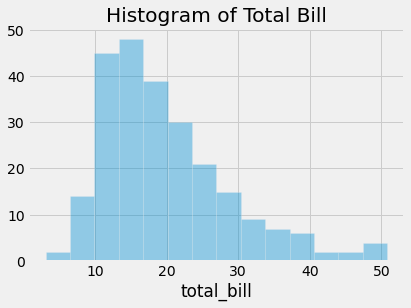

In [33]:
# Plot a histogram of the total bill
sns.distplot(tips["total_bill"], kde = False).set_title("Histogram of Total Bill");

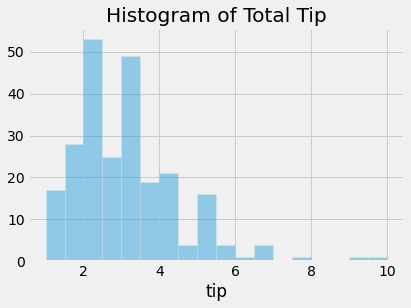

In [34]:
# Plot a histogram of the Tips only
sns.distplot(tips["tip"], kde = False).set_title("Histogram of Total Tip");

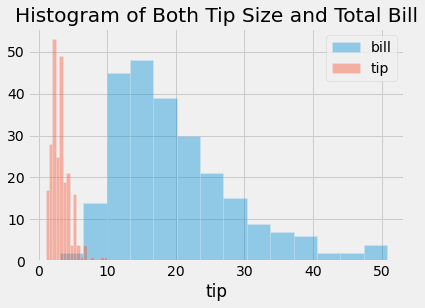

In [35]:
# Plot a histogram of both the total bill and the tips'
sns.distplot(tips["total_bill"], kde = False, label="bill")
sns.distplot(tips["tip"], kde = False, label="tip").set_title("Histogram of Both Tip Size and Total Bill")
plt.legend();

#### Creating a Boxplot

Boxplots do not show the shape of the distribution, but they can give us a better idea about the center and spread of the distribution as well as any potential outliers that may exist. Boxplots and Histograms often complement each other and help an analyst get more information about the data

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


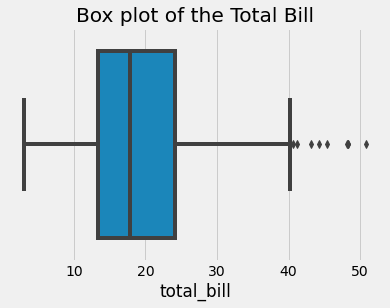

In [36]:
# Create a boxplot of the total bill amounts
sns.boxplot(tips["total_bill"]).set_title("Box plot of the Total Bill");

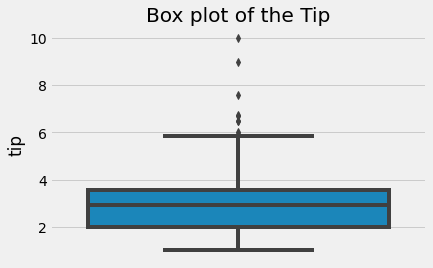

In [37]:
# Create a boxplot of the tips amounts
sns.boxplot(y="tip", data=tips).set_title("Box plot of the Tip");

#### Creating Boxplots Plotted by Groups

While looking at a single variable is interesting, it is often useful to see how a variable changes in response to another. Using graphs, we can see if there is a difference between the tipping amounts of smokers vs. non-smokers, if tipping varies according to the time of the day, or we can explore other trends in the data as well.

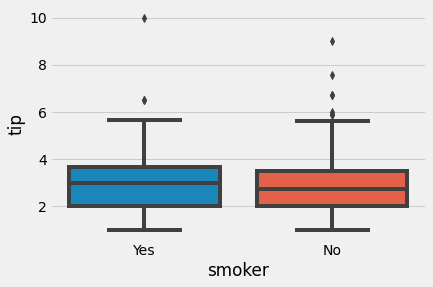

In [38]:
# Create a boxplot of the tips grouped by smoking status
sns.boxplot(y="tip", x="smoker", data=tips);

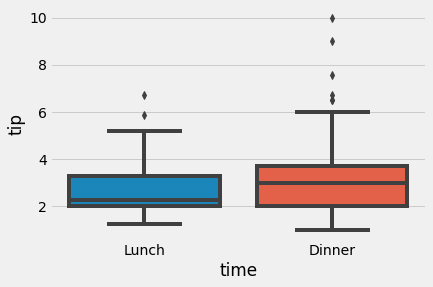

In [39]:
# Create a boxplot of the tips grouped by time of day
sns.boxplot(y="tip", x="time", data=tips);

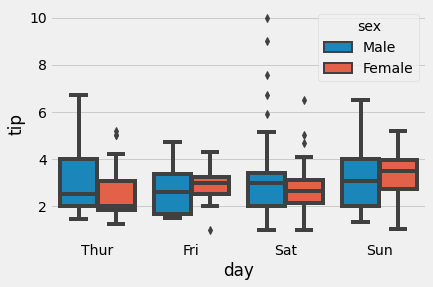

In [40]:
# Create a boxplot of the tips grouped by the day, color by sex
sns.boxplot(y="tip", x="day", hue="sex", data=tips);

#### Plot by more categorical variables
* [Seaborn catplot](https://seaborn.pydata.org/tutorial/categorical.html)
* [examples](https://seaborn.pydata.org/generated/seaborn.catplot.html)

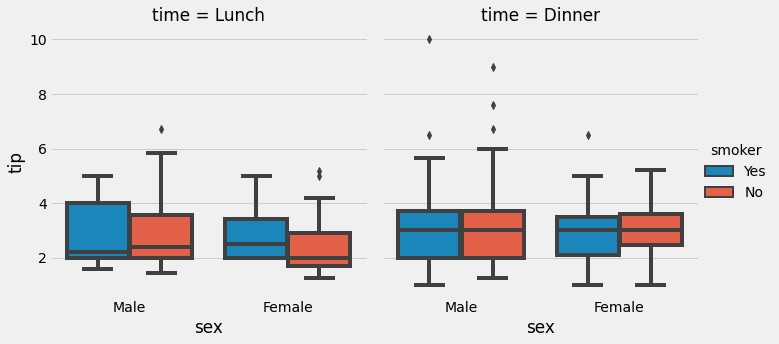

In [41]:
# how many categorical variables are shown?
# sex, time and smoker
sns.catplot(x="sex", y="tip",
                hue="smoker", col="time",
                data=tips, kind="box");

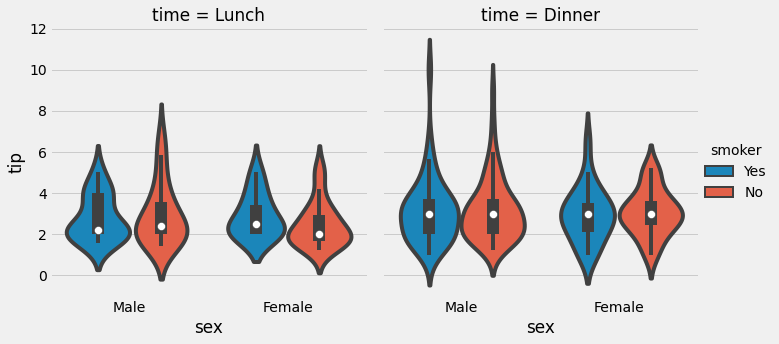

In [42]:
sns.catplot(x="sex", y="tip",
                hue="smoker", col="time",
                data=tips, kind="violin");

##  HW Questions Start Here

For Question 1 - 5, you will work with US Census Data (Did you fill out 2020 Census?)

Read the US Census Data set `nc-est2020-agesex-res.csv` information [here](https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2010-2019/nc-est2019-agesex-res.pdf), make sure you understand the data fully, what is each row and each column etc.

First, let's read in the data, save as a dataframe and select some useful columns:

In [43]:
full = pd.read_csv('nc-est2020-agesex-res.csv')
full

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
0,0,0,3944153,3944160,3951495,3963264,3926731,3931411,3954973,3984144,3963268,3882437,3826908,3762227,3735010
1,0,1,3978070,3978090,3957904,3966768,3978210,3943348,3949559,3973828,4003586,3981864,3897917,3842257,3773884
2,0,2,4096929,4096939,4090799,3971498,3980139,3993047,3960015,3967672,3992657,4021261,3996742,3911822,3853025
3,0,3,4119040,4119051,4111869,4102429,3983007,3992839,4007852,3976277,3984985,4009060,4035053,4009037,3921526
4,0,4,4063170,4063186,4077511,4122252,4112849,3994539,4006407,4022785,3992241,4000394,4021907,4045996,4017847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54166,57127,59226,60675,62415,68627,69729,76313,82046,84349,85452
302,2,98,36641,36675,37567,40081,42573,43869,45899,46622,52146,53004,57386,62429,62702
303,2,99,26193,26214,26098,26997,29078,30681,32247,33567,34289,38508,39398,42288,45572
304,2,100,44202,44246,45079,47430,50051,52831,57125,60327,64400,67129,72068,76911,79772


From the full dataset, let's take out 4 columns of insterest: SEX, AGE, POPESTIMATE2010 and POPESTIMATE2019. Let's also rename the two columns with simple names '2010' and '2019':

In [44]:
partial = full[[ 'SEX', 'AGE', 'POPESTIMATE2010', 'POPESTIMATE2020']]
partial.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2020':'2020'}, inplace=True)
partial.head()

/var/folders/_6/l3fpk3z10lb5g2csy8ykd4lw0000gn/T/ipykernel_1395/3678222092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  partial.rename(columns={'POPESTIMATE2010': '2010', 'POPESTIMATE2020':'2020'}, inplace=True)


,SEX,AGE,2010,2020
0,0,0,3951495,3735010
1,0,1,3957904,3773884
2,0,2,4090799,3853025
3,0,3,4111869,3921526
4,0,4,4077511,4017847


**Question 1** Let's exclude age 999 and save the table as `no_999`. (why do we want to exclude it?)

In [45]:
no_999 = partial[partial['AGE']==999]

index_delete = partial[partial['AGE']==999].index
partial = partial.drop(index_delete)
partial.head()

,SEX,AGE,2010,2020
0,0,0,3951495,3735010
1,0,1,3957904,3773884
2,0,2,4090799,3853025
3,0,3,4111869,3921526
4,0,4,4077511,4017847


We want to exclude those rows, because it represents the sum for female and male, so if we use it, it will duplicate the data.

**Question 2** Create one dataframe with 3 columns: Age, Male, Female, where Age should be 0 to 100, and Male and Female columns should have 2020 population of male and female for that age. Your dataframe should have 101 rows.

**Hint**: First create seperate dataframes for male and female then combine. You want to use df.reset_index(drop=True), otherwise index will be matched when combining and creating lots of `NaNs`.

In [46]:
male = partial[partial['SEX'] == 1][['AGE','2020']]
male.set_index('AGE', inplace=True)
male.rename( columns = {'2020':'Male'} ,inplace=True)

female = partial[partial['SEX'] == 2][['AGE','2020']]
female.set_index('AGE', inplace=True)
female.rename( columns = {'2020':'Female'} ,inplace=True)

In [47]:
pop_2020 = pd.concat([male, female], axis=1)
pop_2020.reset_index(inplace=True)
pop_2020

,AGE,Male,Female
0,0,1908141,1826869
1,1,1926654,1847230
2,2,1968545,1884480
3,3,2004835,1916691
4,4,2052982,1964865
...,...,...,...
96,96,47168,114037
97,97,34292,85452
98,98,23467,62702
99,99,16728,45572


**Question 3**: Use visualization to show the population of male and female change over age: create two lines on the same plot to show population over age.

<AxesSubplot:xlabel='AGE'>

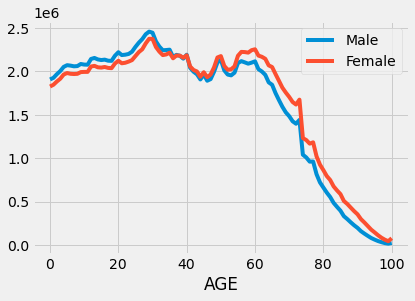

In [48]:
pop_2020.plot(x='AGE')

**Question 4** Add one column to your above dataframe call it `Percent Female`, and the value should be the percentage of female population as total for each age. 
- Use visualization to show change of percentage of female with age. What do you see?

<AxesSubplot:>

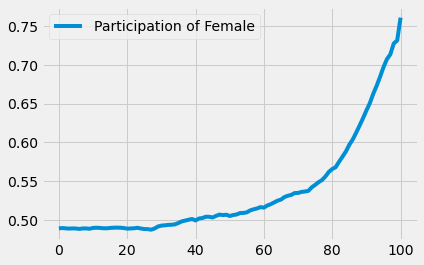

In [49]:
pop_2020['Participation of Female'] = pop_2020['Female']/(pop_2020['Female']+pop_2020['Male'])
pop_2020['Participation of Female'].plot(x='AGE', legend='Participation of Female')

**Question 5**: Suppose population increase at a constant rate g each year, that is pop2021 = pop2020*(1+g). Use this assumption to calculate growth rate g from 2010 to 2020 for EACH age. Add to this column `Growth Rate` to the following dataframe `everyone`.

- Visualize the change of grouth rate ove age using a line plot.

In [50]:
everyone = no_999.loc[no_999['SEX']==0].drop(columns='SEX')
g=(everyone['2020']/everyone['2010'])**(1/(2020-2010))-1
everyone['Growth Rate'] = g
everyone

,AGE,2010,2020,Growth Rate
101,999,309327143,329484123,0.006333


/var/folders/_6/l3fpk3z10lb5g2csy8ykd4lw0000gn/T/ipykernel_1395/3200641707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  growrate_age['Growth Rate'] = (growrate_age['2020']/growrate_age['2010'])**(1/(2020-2010))-1


<AxesSubplot:>

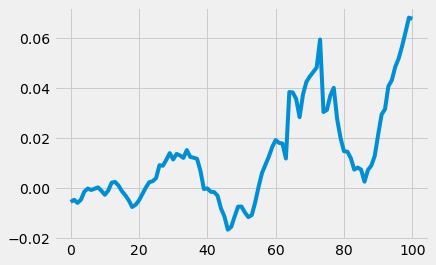

In [51]:
growrate_age = partial[partial['SEX']==0]
growrate_age['Growth Rate'] = (growrate_age['2020']/growrate_age['2010'])**(1/(2020-2010))-1
growrate_age['Growth Rate'].plot(x='AGE')

**Question 6**: Suppose the population distribution is throwing a fair die, which is a discrete uniform distribution. Complete the following simulation to show that Central Limit Theorem (CLT) still holds, i.e., show that sample mean is approximately normal for large sample size. However, sample median is not normal for large sample size, i.e., CLT only applies to sample mean, not sample median. 

**Note**: you need `replace=True` in generating random samples, i.e., assume the population is infinite.

In [52]:
die = pd.DataFrame({'face': np.arange(1, 7)})
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


In [53]:
pop_mean = np.mean(die['face'])
pop_median = np.median(die['face'])
pop_sd = np.std(die['face'])
[pop_mean, pop_median, pop_sd]

[3.5, 3.5, 1.707825127659933]

In [54]:
def sample_mean(sample_size=100):
    """
    function to simulate a sample mean
    sample_size is the sample size
    returns one sample mean
    """
    
    return np.mean(die.sample(sample_size, replace = True))

In [55]:
# try out the function
sample_mean(100)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


face    3.48
dtype: float64

In [56]:
def sample_median(sample_size=100):
    """
    function to simulate a sample median
    sample_size is the sample size
    returns one sample median
    """
    return np.mean(die.sample(sample_size, replace = True))

In [57]:
# try out the function
sample_median(100)

face    3.21
dtype: float64

In [58]:
def simu_stat(stat, sample_size, rep):
    """
    function to simulate a particular statistics multiple times
    stat is the function to calculate the statistic
    sample_size is the sample size
    rep is number of samples to draw
    returns list of simulated stats
    """
    boot_stats = []
    for i in np.arange(rep):
        boot_stats = np.append(boot_stats, stat(sample_size))
    return boot_stats

In [59]:
# try out the function
simu_stat(sample_mean, 100, 10)

array([3.73, 3.38, 3.45, 3.86, 3.52, 3.3 , 3.4 , 4.04, 3.66, 3.4 ])

Sample size:  1000
Population mean: 3.5
Average of sample means:  3.4995847
Population SD: 1.707825127659933
SD of sample means: 0.05445234637653367
SD by CLT: 0.05400617248673217


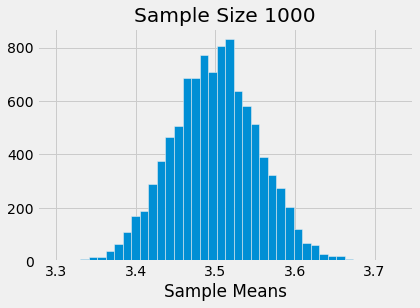

In [60]:
# simulate sample mean
# change the sample size n here to see different simulation results
sample_size = 1000
rep = 10000
stat = sample_mean
# call the function simu_stat
sample_means = simu_stat(stat, sample_size, rep)
plt.hist(sample_means, bins=40)
plt.xlabel('Sample Means')
plt.title('Sample Size ' + str(sample_size))
print("Sample size: ", sample_size)
print("Population mean:", pop_mean)
print("Average of sample means: ", np.mean(sample_means))
print("Population SD:", pop_sd)
print("SD of sample means:", np.std(sample_means))
print("SD by CLT:", pop_sd / np.sqrt(sample_size))

Sample size:  1000
Population median: 3.5
Average of sample median:  3.5001401000000003
Population SD: 1.707825127659933
SD of sample median: 0.054314490442146285
SD by CLT: 0.05400617248673217


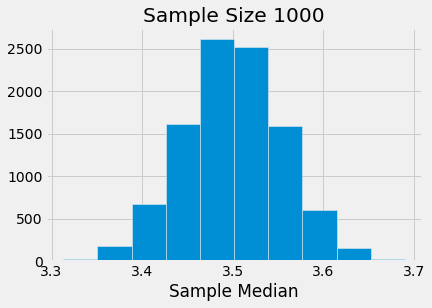

In [61]:
# simulate sample median
# change the sample size n here to see different simulation results
# for a large enough n, say 1000, does the histogram look normal to you?
sample_size = 1000
rep = 10000
stat = sample_median
# call the function simu_stat
sample_medians = simu_stat(stat, sample_size, rep)
plt.hist(sample_medians)
plt.xlabel('Sample Median')
plt.title('Sample Size ' + str(sample_size))
print("Sample size: ", sample_size)
print("Population median:", pop_median)
print("Average of sample median: ", np.mean(sample_medians))
print("Population SD:", pop_sd)
print("SD of sample median:", np.std(sample_medians))
print("SD by CLT:", pop_sd/np.sqrt(sample_size))

**Question 7**:
Let $X_1, \dots, X_n \overset{\text{i.i.d.}} \sim \text{Uniform}(0, \theta)$ where $\theta$ is the unknown parameter and $0 < \theta$. Find the MLE $\hat{\theta}$.

**Solution**:




We can obtain de PDF:

$
PDF=
\begin{cases}
\frac{1}{\theta} & x \in [0,\theta] \\
0 &\text{o.w.}  \\
\end{cases}
$

From it we can define our likelihood function:

$L(\theta|x_i) = \Pi^n_{i=1} \frac{1}{\theta}$

$L(\theta|x_i) = (\frac{1}{\theta})^n$ , where $0<x_i\leq \theta$

If we think about this function, it increases as $\theta$ tends to 0. Therefore, we have to minimize the value of $\theta$, in oreder to maximize the function. As the value $\theta$ is constraint, such that it has to be greater or equal to all values of $X_i$.

The minimum value that $\theta$ can have is $max\{X_1, X_2, ..., X_n\}$. Therefore:

$\hat{\theta} = max\{X_1, X_2, ..., X_n\}$



**Question 8**:

Let $X_1, X_2, \cdots X_n \sim \text{Uniform}(0, \theta)$. Define the two point estimate:

$$ \hat{\theta}^1 = \max \{X_1, X_2, \cdots X_n\} \quad \hat{\theta}^2 = 2 \bar{X}_n $$ 

Find the mean square error for both $\hat{\theta}^1$ and $\hat{\theta}^2$. Which one has the smaller MSE?

**Hint**: use MSE = $\text{bias}^2$ + variance

**Solution**:



From last problem, we know that:

$
PDF=
\begin{cases}
\frac{1}{\theta} & x \in [0,\theta] \\
0 &\text{o.w.}  \\
\end{cases}
$

$
CDF=
\begin{cases}
0 & x < 0 \\
\frac{x}{\theta} & x \in [0,\theta] \\
1 & x>1  \\
\end{cases}
$

#### 1) $\hat{\theta}_1 = \max \{X_1, X_2, \cdots X_n\}$

We can define $y = \max \{X_1, X_2, \cdots X_n\}$, so that:

$f_{\hat{\theta}_1} = n \frac{1}{\theta} (\frac{y}{\theta})^{(n-1)} = n \frac{y^{n-1}}{\theta^n}$

We can then calculate the bias:

$bias_{\hat{\theta}_1} = \mathbb{E}[\hat{\theta}_1]-\theta$

$=\int_0^\theta y \cdot \frac{n y^{n-1}}{\theta^n} d y - \theta$

$=\left[\frac{n}{\theta^n} \frac{y^{n+1}}{n+1}\right]_0^\theta-\theta$

$=\frac{n \theta^{n+1}}{\theta^n (n+1)}-\theta$

$=-\frac{\theta}{n+1}$

Then the variance:

$\operatorname{Var}(\hat{\theta}_1) =\mathbb{E}\left[\hat{\theta}^2\right]-\mathbb{E}[\hat{\theta}]^2$

$ =\int_0^\theta y^2 \cdot \frac{n y^{n-1}}{\theta^n} d y-\left(\frac{n \theta}{n+1}\right)^2$

$ =\left[\frac{n}{\theta^n} \cdot \frac{y^{n+2}}{n+2}\right]_0^\theta-\left(\frac{n \theta}{n+1}\right)^2$

$=\frac{n(\theta)^{n+2}}{\theta^n(n+2)}-\left(\frac{n \theta}{n+1}\right)^2$

$=\frac{n \theta^2}{n+2}-\frac{(n \theta)^2}{(n+1)^2}$

$=\frac{\theta^2 n}{(n+2)(n+1)^2}$

Finally, we can calculate the Mean Square Error of $\hat{\theta}_1$:

$MSE_{\theta_1}= \operatorname{Var}(\hat{\theta}_1) + (bias_{\hat{\theta}_1})^2$

$=\frac{\theta^2 n}{(n+2)(n+1)^2} + (-\frac{\theta}{n+1})^2$

$=\frac{\theta^2 (2n+2)}{(n+2)(n+1)^2}$

$=\frac{2\theta^2}{(n+2)(n+1)}$

#### 2) $\hat{\theta}_2 = 2 \bar{X_n} = \frac{2}{n} \sum_{i=1}^n x_i$ 

We calculate first the bias:

$bias_{\hat{\theta}_2} = \mathbb{E}[\hat{\theta}_2]-\theta$

$bias_{\hat{\theta}_2} = \mathbb{E}[\frac{2}{n} \sum_{i=1}^n x_i]-\theta$

$bias_{\hat{\theta}_2} = \frac{2}{n} \mathbb{E}[\sum_{i=1}^n x_i]-\theta$

As the random variables follow an uniform distribution, we know that the expectation of a single X is $\mathbb{E}[X]= \frac{b-a}{2}=\frac{\theta}{2}$. As they are independent variables are independent $\sum_{i=1}^n \mathbb{E}[x_i]= n\frac{b-a}{2}=n \frac{\theta}{2}$.

$bias_{\hat{\theta}_2} = \frac{2}{n} n \frac{\theta}{2}-\theta$

$bias_{\hat{\theta}_2} = 0$


We can then calculate the variance:

$\operatorname{Var}(\hat{\theta}_2) = \operatorname{Var}(\frac{2 \sum_{i=1}^n x_i]}{n})$

$\operatorname{Var}(\hat{\theta}_2) = \frac{4}{n^2} \operatorname{Var}(\sum_{i=1}^n x_i)$


As the random variables follow an uniform distribution, we know that the variance of a single X is $\operatorname{Var}(X)= \frac{(b-a)^2}{12}=\frac{\theta^2}{12}$. As they are independent variables are independent $\sum_{i=1}^n \operatorname{Var}(X)= n\frac{(b-a)^2}{12}=n \frac{\theta^2}{12}$.

$\operatorname{Var}(\hat{\theta}_2) = \frac{4}{n^2}n\frac{\theta^2}{12}$

$\operatorname{Var}(\hat{\theta}_2) = \frac{\theta^2}{3n}$

Finally, we can calculate the Mean Square Error of $\hat{\theta}_2$:

$MSE_{\hat{\theta}_2}= \operatorname{Var}(\hat{\theta}_2) + (bias_{\hat{\theta}_1})^2$

$MSE_{\hat{\theta}_2}= \frac{\theta^2}{3n}$

For n>1, $MSE_{\hat{\theta}_2} > MSE_{\hat{\theta}_1}$, therefore we can conclude that $\hat{\theta}_1$ is a better estimador than $\hat{\theta}_2$.

**Question 9**: The file `geysers.csv` has data on eruption times and waiting times between eruptions of the old faithful geyser at the [Yellowstone National Park](https://www.nps.gov/yell/index.htm).

- Estimate the mean waiting time. 
- Use Central Limit Theorem, give a standard error and a 90% confidence interval for the mean waiting time.
- Estimate the median waiting time.
- Use Bootstrap, give a standard error and a 90% confidence interval for the median waiting time. 


In [62]:
geyser = pd.read_csv("geysers.csv")
geyser

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85
...,...,...
267,4.117,81
268,2.150,46
269,4.417,90
270,1.817,46


In [63]:
waiting_time = []
rep=100000
for dummy in range(rep):
    sample_x = geyser['waiting'].sample(30, replace=True)
    waiting_time.append(np.mean(sample_x))

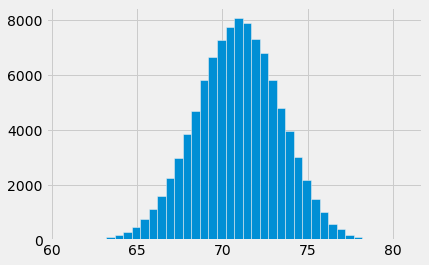

In [64]:
plt.hist(waiting_time, bins=40)
plt.show()

In [65]:
mean_est = np.mean(waiting_time)
sample_size = geyser.shape[0]
# approx standard error by CLT
mean_est_se = np.std(waiting_time)
print(mean_est_se)

2.4831431280396536


In [66]:
import scipy.stats

alpha = 0.1
# get the normal percentile
z_95 = scipy.stats.norm.ppf(1 - alpha/2)
mean_ci_l = mean_est-(z_95*mean_est_se)
mean_ci_u = mean_est+(z_95*mean_est_se)
mean_ci = (mean_ci_l, mean_ci_u)

In [67]:
median_est = np.median(waiting_time)
median_est

70.93333333333334

In [68]:
# bootstrap
random.seed = 2022
rep = 10000
boot_median = []

for i in range(rep):
    boot_sample = geyser['waiting'].sample(30, replace=True)
    median_est = np.median(boot_sample)
    boot_median = np.append(boot_median, median_est)

In [69]:
median_est_se = np.std(boot_median)

In [87]:
# bootstrap percentile interval
median_ci_l = median_est-(z_95*median_est_se)
median_ci_u = median_est+(z_95*median_est_se)
median_ci =(median_ci_l, median_ci_u)

In [89]:
#new answer (do not know if it is right)
median_ci_u = np.percentile(boot_median, 95)
median_ci_l = np.percentile(boot_median, 5)
median_ci =(median_ci_l, median_ci_u)
median_ci

(66.0, 79.0)

In [90]:
print("Mean waiting time is: %.3f" % mean_est, "with standard error: %.3f" % mean_est_se)
print("90%% confidence interval for mean waiting time is: %.3f, %.3f"  % mean_ci)
print("Median waiting time is: %.3f" % median_est, "with standard error: %.3f" % median_est_se)
print("90%% confidence interval for median waiting time is: %.3f, %.3f" % median_ci)

Mean waiting time is: 70.895 with standard error: 2.483
90% confidence interval for mean waiting time is: 66.811, 74.980
Median waiting time is: 77.000 with standard error: 3.899
90% confidence interval for median waiting time is: 66.000, 79.000


**Question 10**: Let $X_1, \dots, X_n \overset{\text{i.i.d.}} \sim N(\mu=3, \sigma^2=1)$.  Let $\theta = e^\mu$. We know the maximum likelihood estimator(MLE) of $\mu$ is sample mean $\bar{X_n}$. It turns out that $\hat{\theta} = e^{\overline{X}}$ is the MLE of $\theta$. This is known as functional invariance of MLE: 

If $\hat{\theta}$ is the MLE for $\theta$, and $g(\theta )$ is the transformation of $\theta$ through a given function $g$, then the MLE for $\alpha = g(\theta)$ is $\hat{\alpha }=g(\hat {\theta })$.   

Create a dataset consisting of $n = 100$ observations. Use **both non-parametric and parametric bootstrap** to get the 95% confidence interval for $\theta$. Plot a histogram of the bootstrap replications for the parametric and non-parametric bootstraps to compare the estimates of the distribution of $\hat{\theta}$.  

**Bonus**: In this case, we can also derive the true sampling distribution of $\hat{\theta}$ analytically. Since we know the sampling distribution of $\bar{X_n}$, and $\hat{\theta}$ is a transformation of $\bar{X_n}$. Give it a try!

In [73]:
random.seed = 2022
mean = 3
sd = 1
sample_size = 100
X = np.random.normal(loc=mean, scale=sd**(1/2), size=sample_size)
data = pd.DataFrame({"Data": X})
data.head()

,Data
0,2.312193
1,3.016963
2,2.647587
3,2.942626
4,2.637780


In [74]:
# non-parametric bootstrap 
random.seed = 2022
rep = 10000
np_boot_theta_hat = []

for i in range(rep):
    boot = data.sample(sample_size, replace = True)
    theta_hat = np.exp(np.mean(boot))
    np_boot_theta_hat = np.append(np_boot_theta_hat, theta_hat)

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [75]:
np_boot_theta_hat

array([15.84570424, 16.57501968, 22.12664239, ..., 18.51468761,
       17.81097179, 17.88128558])

In [76]:
np_boot_ci_l = np.percentile(np_boot_theta_hat, 2.5)
np_boot_ci_u = np.percentile(np_boot_theta_hat, 97.5)
np_boot_ci = (np_boot_ci_l, np_boot_ci_u)

In [77]:
# parametric bootstrap 
random.seed = 2022
rep = 10000
boot_theta_hat = []
mu_hat = np.mean(X)
deviation = np.std(data)

for i in range(rep):
    boot = np.random.normal(loc = mu_hat, scale = deviation, size=sample_size)
    theta_hat = np.exp(np.mean(boot))
    boot_theta_hat = np.append(boot_theta_hat, theta_hat)    

In [78]:
boot_ci_l = np.percentile(boot_theta_hat, 2.5)
boot_ci_u = np.percentile(boot_theta_hat, 97.5)
boot_ci = (boot_ci_l, boot_ci_u)

In [79]:
print("95%% non-parametric bootstrap confidence interval is: %.3f, %.3f"  % np_boot_ci)
print("95%% parametric bootstrap confidence interval is: %.3f, %.3f" % boot_ci)

95% non-parametric bootstrap confidence interval is: 14.743, 24.055
95% parametric bootstrap confidence interval is: 14.752, 24.092


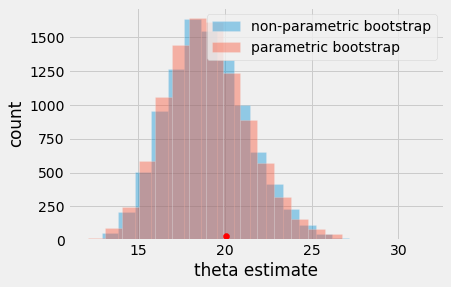

In [80]:
# plot sampling distribution of theta estimated by both non-parametric and parametric bootstrap
plt.hist(np_boot_theta_hat, bins=20, label='non-parametric bootstrap', alpha=0.4)
plt.hist(boot_theta_hat, bins=20, label='parametric bootstrap', alpha=0.4)
plt.scatter(np.exp(mean), 30, color='r')
plt.xlabel('theta estimate')
plt.ylabel('count')
plt.legend();

**Bonus Solution**: 

You're done with HW 3!  Be sure to...

* **Save and Checkpoint** from the File menu,
* **Close and Halt** from the File menu,
* **Rename your ipynb file**, replacing LASTNAME with your last name,
* **Upload** your file to the course website.